<a href="https://colab.research.google.com/github/sakethrammamidi/Text-Analysis-for-Sentiment-on-Financial-News/blob/main/Text_Analysis_for_Sentiment_on_Financial_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text Analysis for Sentiment on Financial News

 Installing Required Libraries

In [18]:
!pip install newspaper3k feedparser yfinance vaderSentiment textblob
!pip install newspaper3k feedparser yfinance vaderSentiment textblob lxml_html_clean

 Importing Libraries

In [19]:
import pandas as pd
from newspaper import Article, build
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import feedparser
from datetime import datetime


 Collect URLs from Free News Sources

Using newspaper3k for Reuters and BBC:

In [20]:
import feedparser

# Define RSS URLs
bbc_business_rss = 'https://feeds.bbci.co.uk/news/business/rss.xml'
cnbc_rss = 'https://www.cnbc.com/id/100003114/device/rss/rss.html'  # CNBC Top News RSS

# Parse RSS feeds
bbc_feed = feedparser.parse(bbc_business_rss)
cnbc_feed = feedparser.parse(cnbc_rss)

# Collect article data from RSS feeds
articles = []
for feed in [bbc_feed, cnbc_feed]:
    for entry in feed['entries'][:5]:  # Limiting to the first 5 articles from each source
        articles.append({
            'title': entry['title'],
            'link': entry['link'],
            'published': entry.get('published', 'N/A'),
            'summary': entry.get('summary', 'No summary available')
        })

# Convert article data into a DataFrame
import pandas as pd
news_df = pd.DataFrame(articles)
news_df.head()

,title,link,published,summary
0,Stocks and dollar rise as US election result i...,https://www.bbc.com/news/articles/c6246e3w935o,"Wed, 06 Nov 2024 01:47:27 GMT",Investors are also focused on a US central ban...
1,Warning millions will struggle to pay water bi...,https://www.bbc.com/news/articles/ce9gve1grjmo,"Wed, 06 Nov 2024 00:09:36 GMT",A proposed average rise of 21% a year will cau...
2,Treasury should have told us about overspend b...,https://www.bbc.com/news/articles/cn9xjw4rw10o,"Tue, 05 Nov 2024 21:00:52 GMT","Richard Hughes, chair of the Office for Budget..."
3,PM responds to Sir Alan Bates after repeated r...,https://www.bbc.com/news/articles/c7v372zyz98o,"Tue, 05 Nov 2024 18:00:41 GMT",Sir Alan wrote to the PM twice in the past mon...
4,Shoppers warned over luxury advent calendar scams,https://www.bbc.com/news/articles/cdxvkkjd9vko,"Tue, 05 Nov 2024 10:00:05 GMT",The consumer group Which? is urging shoppers l...


In [21]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=news_df)

https://docs.google.com/spreadsheets/d/1NQR-ysNNTQKbdr3lmaqbaITneJLsyEzTazev-LKl6EQ#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


Perform Sentiment Analysis

 Using VADER and TextBlob to analyze the sentiment of each article summary.


In [22]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define functions for VADER and TextBlob sentiment analysis
def vader_sentiment(text):
    return sia.polarity_scores(text)['compound']

def textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis on summaries
news_df['vader_sentiment'] = news_df['summary'].apply(vader_sentiment)
news_df['textblob_polarity'] = news_df['summary'].apply(textblob_sentiment)

news_df.head()

,title,link,published,summary,vader_sentiment,textblob_polarity
0,Stocks and dollar rise as US election result i...,https://www.bbc.com/news/articles/c6246e3w935o,"Wed, 06 Nov 2024 01:47:27 GMT",Investors are also focused on a US central ban...,0.3818,0.000
1,Warning millions will struggle to pay water bi...,https://www.bbc.com/news/articles/ce9gve1grjmo,"Wed, 06 Nov 2024 00:09:36 GMT",A proposed average rise of 21% a year will cau...,-0.1531,-0.150
2,Treasury should have told us about overspend b...,https://www.bbc.com/news/articles/cn9xjw4rw10o,"Tue, 05 Nov 2024 21:00:52 GMT","Richard Hughes, chair of the Office for Budget...",-0.2584,0.000
3,PM responds to Sir Alan Bates after repeated r...,https://www.bbc.com/news/articles/c7v372zyz98o,"Tue, 05 Nov 2024 18:00:41 GMT",Sir Alan wrote to the PM twice in the past mon...,0.0772,0.025
4,Shoppers warned over luxury advent calendar scams,https://www.bbc.com/news/articles/cdxvkkjd9vko,"Tue, 05 Nov 2024 10:00:05 GMT",The consumer group Which? is urging shoppers l...,-0.0516,0.100


In [23]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=news_df)

https://docs.google.com/spreadsheets/d/1TmOO-7y2YX6cULAD8Obdg0IgOyX1fQ8w5wIdtDI3NYk#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


Visualize Sentiment Data

We can use this block to visualize the distribution of the sentiment scores, which can give insights into the overall market sentiment based on news summaries.

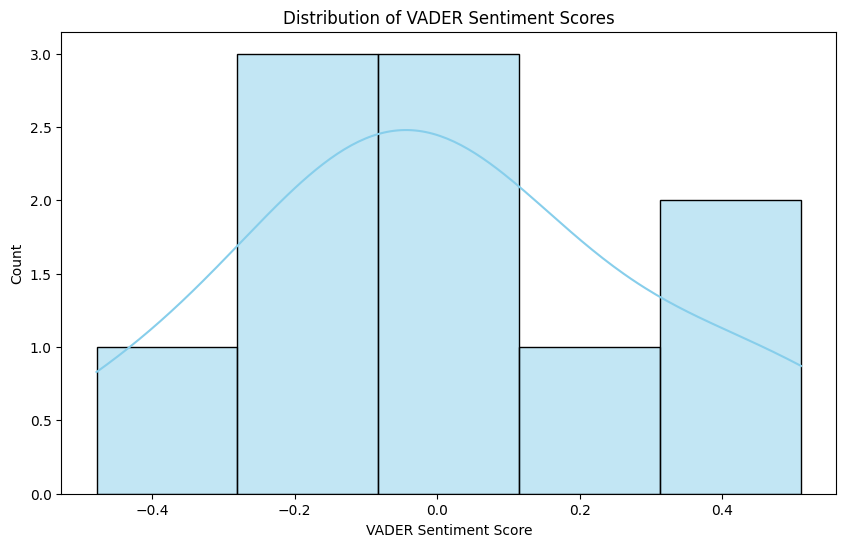

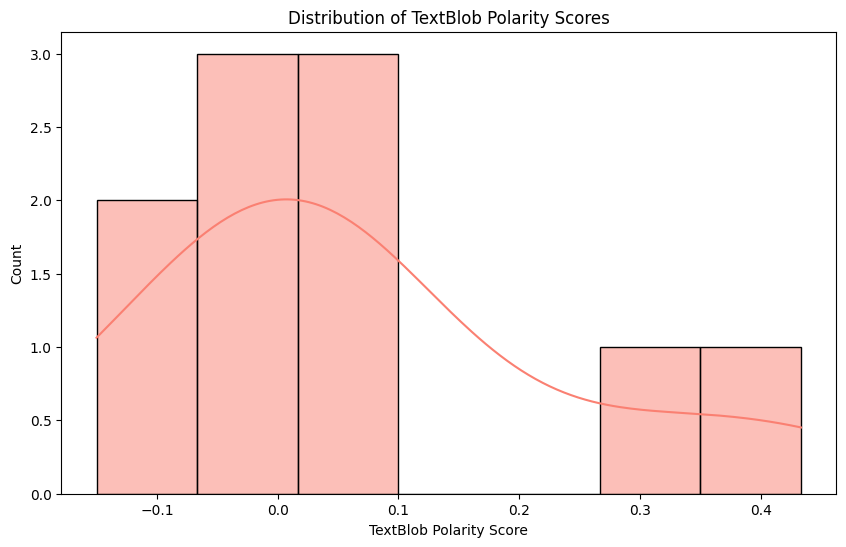

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(news_df['vader_sentiment'], kde=True, color="skyblue")
plt.title("Distribution of VADER Sentiment Scores")
plt.xlabel("VADER Sentiment Score")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(news_df['textblob_polarity'], kde=True, color="salmon")
plt.title("Distribution of TextBlob Polarity Scores")
plt.xlabel("TextBlob Polarity Score")
plt.show()

Further Exploration - Integrate with Stock Data

We can extend the analysis by fetching stock data for companies of interest using yfinance and correlating it with the news sentiment scores.

In [25]:
import yfinance as yf

# Example: Fetch stock data for a specific company (e.g., Apple, ticker "AAPL")
ticker = "AAPL"
stock_data = yf.download(ticker, start="2023-01-01", end="2023-12-31")

# View stock data
stock_data.head()

# Merge or analyze stock trends in relation to sentiment scores (further exploration)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-01-03 00:00:00+00:00,123.904633,125.070000,130.899994,124.169998,130.279999,112117500
2023-01-04 00:00:00+00:00,125.182610,126.360001,128.660004,125.080002,126.889999,89113600
2023-01-05 00:00:00+00:00,123.855095,125.019997,127.769997,124.760002,127.129997,80962700
2023-01-06 00:00:00+00:00,128.412216,129.619995,130.289993,124.889999,126.010002,87754700
2023-01-09 00:00:00+00:00,128.937286,130.149994,133.410004,129.889999,130.470001,70790800


Set Up Data Preprocessing


Before analyzing the sentiment, it's important to preprocess the text. This step includes cleaning and normalizing the article summaries.

In [26]:
import re

# Function to clean the text (remove unnecessary characters, links, etc.)
def clean_text(text):
    # Remove links, special characters, etc.
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

# Clean the summaries in the dataframe
news_df['cleaned_summary'] = news_df['summary'].apply(clean_text)
news_df.head()

,title,link,published,summary,vader_sentiment,textblob_polarity,cleaned_summary
0,Stocks and dollar rise as US election result i...,https://www.bbc.com/news/articles/c6246e3w935o,"Wed, 06 Nov 2024 01:47:27 GMT",Investors are also focused on a US central ban...,0.3818,0.000,investors are also focused on a us central ban...
1,Warning millions will struggle to pay water bi...,https://www.bbc.com/news/articles/ce9gve1grjmo,"Wed, 06 Nov 2024 00:09:36 GMT",A proposed average rise of 21% a year will cau...,-0.1531,-0.150,a proposed average rise of 21 a year will caus...
2,Treasury should have told us about overspend b...,https://www.bbc.com/news/articles/cn9xjw4rw10o,"Tue, 05 Nov 2024 21:00:52 GMT","Richard Hughes, chair of the Office for Budget...",-0.2584,0.000,richard hughes chair of the office for budget ...
3,PM responds to Sir Alan Bates after repeated r...,https://www.bbc.com/news/articles/c7v372zyz98o,"Tue, 05 Nov 2024 18:00:41 GMT",Sir Alan wrote to the PM twice in the past mon...,0.0772,0.025,sir alan wrote to the pm twice in the past mon...
4,Shoppers warned over luxury advent calendar scams,https://www.bbc.com/news/articles/cdxvkkjd9vko,"Tue, 05 Nov 2024 10:00:05 GMT",The consumer group Which? is urging shoppers l...,-0.0516,0.100,the consumer group which is urging shoppers lo...


In [27]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=news_df)

https://docs.google.com/spreadsheets/d/1_txP2FCZA4hq3ttdNMZPHpitNkbHqi_AExAjBNM2sJY#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


This step ensures that the text data used for sentiment analysis is cleaner and more consistent.

 Advanced Sentiment Analysis

For a more advanced sentiment analysis, we can use a machine learning model or a pretrained sentiment model, such as from Hugging Face's transformers

In [28]:
!pip install transformers

from transformers import pipeline

# Load a pretrained sentiment analysis pipeline from Hugging Face
sentiment_analyzer = pipeline('sentiment-analysis')

# Apply the transformer sentiment analysis to the cleaned summaries
news_df['transformer_sentiment'] = news_df['cleaned_summary'].apply(lambda x: sentiment_analyzer(x)[0]['label'])
news_df.head()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


,title,link,published,summary,vader_sentiment,textblob_polarity,cleaned_summary,transformer_sentiment
0,Stocks and dollar rise as US election result i...,https://www.bbc.com/news/articles/c6246e3w935o,"Wed, 06 Nov 2024 01:47:27 GMT",Investors are also focused on a US central ban...,0.3818,0.000,investors are also focused on a us central ban...,POSITIVE
1,Warning millions will struggle to pay water bi...,https://www.bbc.com/news/articles/ce9gve1grjmo,"Wed, 06 Nov 2024 00:09:36 GMT",A proposed average rise of 21% a year will cau...,-0.1531,-0.150,a proposed average rise of 21 a year will caus...,NEGATIVE
2,Treasury should have told us about overspend b...,https://www.bbc.com/news/articles/cn9xjw4rw10o,"Tue, 05 Nov 2024 21:00:52 GMT","Richard Hughes, chair of the Office for Budget...",-0.2584,0.000,richard hughes chair of the office for budget ...,NEGATIVE
3,PM responds to Sir Alan Bates after repeated r...,https://www.bbc.com/news/articles/c7v372zyz98o,"Tue, 05 Nov 2024 18:00:41 GMT",Sir Alan wrote to the PM twice in the past mon...,0.0772,0.025,sir alan wrote to the pm twice in the past mon...,NEGATIVE
4,Shoppers warned over luxury advent calendar scams,https://www.bbc.com/news/articles/cdxvkkjd9vko,"Tue, 05 Nov 2024 10:00:05 GMT",The consumer group Which? is urging shoppers l...,-0.0516,0.100,the consumer group which is urging shoppers lo...,NEGATIVE


In [29]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=news_df)

https://docs.google.com/spreadsheets/d/17saF1IQbszUr_D_FhzaJ41g_w0kmt00oQ2W0yDNFY9g#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


This step helps in understanding the relationship between the sentiment of news articles and stock price fluctuations.

Export the Data for Future Use or Reporting

Finally, it is often helpful to export the data for further use or reporting. We can save the DataFrame with sentiment scores and the fetched stock data as a CSV file.

In [30]:
# Save sentiment analysis and news data to CSV
news_df.to_csv("news_sentiment_analysis.csv", index=False)

# If you have stock data integrated, you can also export that
stock_data.to_csv("stock_data_with_sentiment.csv", index=False)